In [2]:
import numpy as np 
import pandas as pd
import numpy.random as rn
import matplotlib.pyplot as plt 
import seaborn as sns

## Example: Symptoms of sleep deprivation



In [3]:
# Sleep deprivation symptoms and class (Yes/No sleep deprived data): 
sleep_dep_df = pd.DataFrame({
    'Slowed thinking': [
        'Mild',   'None', 'None',   'None',   'None',   'None',   'Severe', 'Mild',   'Severe', 'None', 
        'None',   'None', 'Severe', 'Severe', 'Severe', 'Mild',   'Mild',   'Mild',   'Severe', 'None',
        'Severe', 'None', 'Mild',   'None',   'None',   'Severe', 'Mild',   'None',   'Mild',   'Severe', 
        'None',   'None', 'Severe', 'Severe', 'Mild',   'None',   'Severe', 'Mild',   'Severe', 'None', 
        'Mild',   'None', 'Severe', 'Severe', 'None',   'None',   'None',   'Severe', 'Mild',   'None'
    ], 
    'Reduced attention span': [
        'None',   'Severe', 'Mild',   'None',   'Severe', 'Severe', 'None',   'None',   'None',   'Mild',
        'Severe', 'None',   'Mild',   'Severe', 'None',   'Severe', 'Severe', 'Severe', 'None',   'Severe',
        'Mild',   'None',   'Severe', 'Mild',   'Mild',   'Severe', 'Mild',   'None',   'Severe', 'None', 
        'None',   'Mild',   'Severe', 'None',   'Severe', 'None',   'Severe', 'Severe', 'Severe', 'Severe', 
        'Severe', 'None',   'Mild',   'None',   'Severe', 'Severe', 'None',   'Mild',   'Mild',   'None'
    ],
    'Worsened memory': [
        'Mild',   'Mild',   'None',   'Mild',   'None',   'Mild',  'Severe',  'Severe', 'Mild',   'Mild', 
        'Severe', 'Mild',   'Severe', 'None',   'Mild',   'None',  'Severe',  'None',   'None',   'Mild',
        'None',   'None',   'Mild',   'Severe', 'Severe', 'Mild',  'Mild',    'Severe', 'Severe', 'Mild', 
        'Severe', 'Severe', 'Mild',   'Severe', 'Severe', 'None',  'Severe',  'Severe', 'None',   'None', 
        'None',   'Mild',   'None',   'None',   'None',   'Severe', 'Severe', 'Mild',   'None',   'Severe'  
    ],
    'Risky decision-making': [
        'None',   'None',   'Mild', 'Severe', 'Severe', 'Mild',   'Severe', 'None',   'None',   'Severe', 
        'None',   'Severe', 'Mild', 'Severe', 'None',   'Severe', 'Severe', 'None',   'Severe', 'Mild',
        'Severe', 'None',   'None',   'Mild', 'None',   'None',   'Severe', 'None',   'None',   'Mild', 
        'Mild',   'Severe', 'Severe', 'Mild', 'None',   'Mild',   'Mild',   'None',   'Severe', 'Severe', 
        'None',   'Mild',   'Severe', 'None', 'None',   'Mild',   'Severe', 'Severe', 'None',   'Mild'  
    ],
    'Lack of energy': [
        'None',   'Severe', 'Mild',   'Mild',  'Severe', 'None',   'Severe', 'Mild',   'Severe', 'None', 
        'Mild',   'None',   'Severe', 'Severe','None',   'Mild',   'None',   'Severe', 'Severe', 'Severe',
        'None',   'Severe', 'Mild',   'None',  'Severe', 'Severe', 'None',   'Mild',   'Severe', 'Mild', 
        'Severe', 'None',   'Mild',   'None',  'Mild',   'None',   'Mild',   'None',   'Mild',  'Severe', 
        'None',   'Severe', 'Severe', 'Mild', 'Severe',  'Severe', 'Severe', 'Severe', 'Severe', 'Severe'  
    ],
    'Mood changes': [
        'Severe', 'None',   'Severe', 'Mild',   'Severe', 'Mild',   'Severe', 'Mild', 'None',   'None', 
        'Mild',   'Severe', 'None',   'Severe', 'None',   'None',   'Mild',   'None', 'Mild',   'Mild',
        'None',   'Mild',   'None',   'Mild',   'Severe', 'Mild',   'None',   'Mild', 'None',   'None', 
        'None',   'Mild',   'Mild',   'None',   'None',   'None',   'None',   'None', 'Severe', 'None', 
        'None',   'None',   'None',   'Mild',   'Severe', 'Severe', 'Mild',   'Mild', 'None',   'None'
    ],
    'Sleep Deprived': ['No',  'No', 'No', 'No', 'Yes', 'No',  'Yes', 'Yes', 'Yes', 'No', 
                       'Yes', 'No', 'Yes', 'Yes', 'No',  'Yes', 'No',  'No',  'Yes', 'Yes',
                       'No',  'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',  'Yes', 'Yes',
                       'Yes',  'Yes', 'Yes', 'No', 'Yes', 'No',  'Yes', 'No',  'Yes', 'Yes', 
                       'No',  'No',  'Yes', 'No',  'No', 'Yes', 'Yes', 'Yes', 'No',  'Yes'
                      ]
})

sleep_dep_df.head()



,Slowed thinking,Reduced attention span,Worsened memory,Risky decision-making,Lack of energy,Mood changes,Sleep Deprived
0,Mild,None,Mild,None,None,Severe,No
1,None,Severe,Mild,None,Severe,None,No
2,None,Mild,None,Mild,Mild,Severe,No
3,None,None,Mild,Severe,Mild,Mild,No
4,None,Severe,None,Severe,Severe,Severe,Yes


## A new person comes along with a list of symptoms. <br/> Are they sleep deprived?

### We want a model for *conditional probabilities* 

I.e., the probability of being sleep deprived **given** the symptoms: 

$${\large P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots)}$$

* The model has **parameters** $\theta$
* The symptoms are the **features**
* Sleep Deprived is the **discrete label** (that we wish to predict)


### Naive Bayes classifiers begin with Bayes rule...
${\large P_\theta(\text{Sleep Deprived} \mid symptom_1, symptom_2, symptom_3, \dots) \overbrace{=}^{\text{Bayes}} }$

</br> 


$$ \frac{\overbrace{P_\theta( symptom_1, symptom_2, symptom_3, \dots \mid \text{Sleep Deprived})}^{\text{"class conditional probability"}} \, \, P_\theta(\text{Sleep Deprived})}{P_\theta(symptom_1, symptom_2, symptom_3,\dots)}$$

<br>

* To see how it works, we will first discuss:  
    * Parameter estimation (fitting parameters given data)  
    * The Bayes Identity 
    * Likelihood

## Parameter estimation by optimizing a custom loss function

* One step common to most ML algorithms is to estimate ('fit') parameters from data. 

* Parameter estimation is also quite useful in and of itself, i.e., outside of the ML context. 



### Example: exponential distribution

The number of minutes between customers who enter a shop can be modeled by the exponential distribution.

Define the *interarrival time* of the $i$ th customer to be $Y_i$ (minutes).

We can write that $Y_i$ is a *random variable* with an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) as

$${\large Y_i \sim \textrm{Exponential}(\tau)}$$

where $\tau > 0$ is the *rate parameter*.

The probability (density) of $Y_i$ taking the value of $y$ (minutes) is:

$${\large  P(Y_i = y \mid \tau) = \tfrac 1\tau \exp\left(-\tfrac{y}{\tau}\right)}$$

<!-- ${\large \frac 1\tau e^{-t/\tau}}$ where $t=0$ every time a customer comes in.  -->

* The average time between customers is $\tau$ minutes. 

* The probability that the gap between two customer would be, say, between $3$ and $10$ minutes is $\int_3^{10} \frac 1\tau e^{-y/\tau} dy$.
* The probability that the gap between two customer would be, say, between $3$ and $3.01$ minutes is $\int_3^{3.01} \frac 1\tau e^{-y/\tau} dy \simeq \frac 1\tau e^{-3/\tau} \times 0.01$




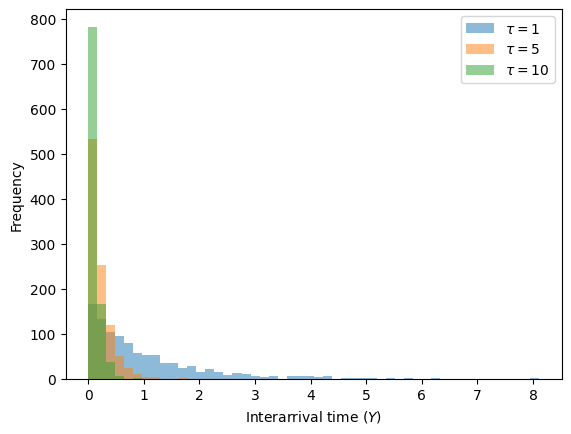

In [4]:
bins = 50
for tau in [1, 5, 10]:
    Y_N = rn.exponential(scale=1/tau, size=1000)  
    _, bins, _ = plt.hist(Y_N, label=f'$\\tau={tau}$', 
                          alpha=0.5, bins=bins)

_ = plt.xlabel('Interarrival time ($Y$)')
_ = plt.ylabel('Frequency')
_ = plt.legend();

### Rare (independent) events often exhibit exponential interarrival times

#### Famous example: **Intervals between Prussian horse-kick deaths** ([Bortkiewicz 1898](https://en.wikipedia.org/wiki/Ladislaus_Bortkiewicz))


<img src="https://github.com/david-biron/DATA221imgs/blob/main/prussian.png?raw=true" width="300">

_"Create an image of Prussian horse-kick deaths as an example of exponentially distributed interarrival times"_

## Problem: we do not know that value of $\tau$. 

### Data driven solutions: record the interarrival times between customers and estimate $\tau$. 

$${\large y_1, \dots, y_n}$$

Then find 

$${\large \tau^* \leftarrow \textrm{argmax}_\tau \,\,P(y_1, \dots, y_n \mid \tau)}$$

* The data $+$ the model provide a function which, in this case, **peaks when the observed data is most probable**. In other words: $\tau$ that maximizes this function will be the optimal choice given our data. 

* We will refer to this function as the **likelihood** of observingthe data given some value of $\tau$. 

* **Note:** `scipy` has a function that minimizes, so we can multiply by $-1$ and then the optimal $\tau$ will be at the minimum of our function. 

* **Note:** 
    * It is mathematically/computationally convenient to $\log$ the function (more on that later). 
    * The $\log$ transformation is monotonic so it won't change where (at which $\tau$) the maximum/minimum is.  
    * $\log(xy) = \log(x)+\log(y) \ \ \ \rightarrow \ \ \ \log\left( \prod_i p_i \right) = \sum_i \log\left(p_i\right) $

* After adding a minus sign and the $\log()$, the function we minimize is called the **negative log likelihood** 





### The negative log likelihood (NLL) is:

$$\begin{align}
\textrm{NLL} &= -\log \prod_{i=1}^n P(Y_i=y_i \mid \tau) \\
&= -\sum_{i=1}^n \log P(Y_i=y_i \mid \tau) \\
&= -\sum_{i=1}^n \log \left[\tfrac{1}{\tau}\exp(-\tfrac{y_i}{\tau})\right]\\
&= -\sum_{i=1}^n \log \left[\tfrac{1}{\tau}\right] -\sum_{i=1}^n \log\left[\exp(-\tfrac{y_i}{\tau})\right]\\
&= -n\log(\tfrac{1}{\tau}) -\sum_{i=1}^n (-\tfrac{y_i}{\tau})\\
&= n\log\tau +\tfrac{1}{\tau}\sum_{i=1}^n y_i\\
\end{align}$$


/var/folders/tq/gj38l6153ks1cvmr6crxqg_00000gp/T/ipykernel_25737/1540361452.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sns.lineplot(x=x, y=y).set(title='minimum at %.2f'%tau_hat)


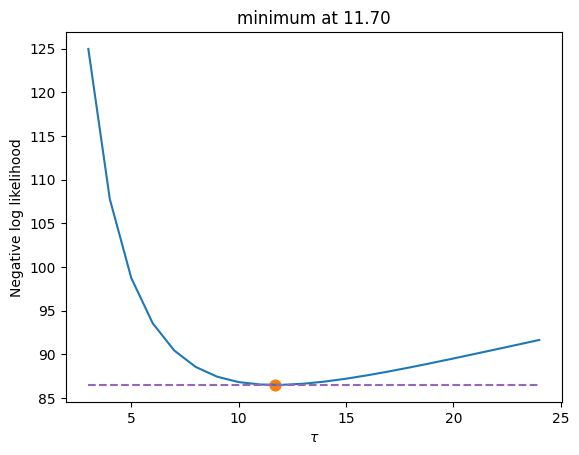

In [4]:
import numpy as np
from scipy.optimize import minimize # optimizer

def custom_loss_function(tau, data): 
    '''
    Loss function that penalizes for deviating from an exponential 
    distribution with mean tau. 
    Input: np.array (data) and a positive float or integer (tau). 
    Output: the log of the probability of observing the data given 
            the values of tau.
    Note: the larger the probability, the larger the log (because 
          log is monotonic).
          The minus sign was put in so we can minimize the functions 
          using scipy. 
    '''    
    
    weights = np.ones(data.shape) # all data points are equally trusted
#    
########### Uncomment to apply weights #################    
#     weights = data>1 # what if I don't trust 
#                      # the small measurements? 
#                      # throwing them out is harsh, 
#                      # but gentler weights are possible 
########################################################    
#
    return(-1*np.sum(np.log( 1/tau * np.exp(-1*data/tau)) * weights))


obs_intervals = np.array([6.78, 3.86, 14.60, 0.13, 7.53, 11.65, \
                          4.42, 21.03, 31.89, 0.98, 0.38, 8.23, \
                          0.03,  1.74, 1.20,  6.62, 35.93, 10.27, \
                          1.69, 3.01])

TRUE_TAU = 8.
obs_intervals = rn.exponential(scale=tau, size=25)

# find optimal tau, starting with an initial guess of tau=5
tau_hat = minimize(custom_loss_function, [5], args=obs_intervals).x 

# the penalty for the predicted tau
loss_hat = custom_loss_function(tau_hat, obs_intervals) 

# plot the loss function and the optimal tau   
x = np.array(range(3,25))
y = [custom_loss_function(t, obs_intervals) for t in x]

sns.lineplot(x=x, y=y).set(title='minimum at %.2f'%tau_hat)
plt.scatter([tau_hat],[loss_hat], color='C1', s=60)
sns.lineplot(x=x,y=loss_hat+np.zeros(x.shape), 
             linestyle='dashed', color='C4')

plt.xlabel('$\\tau$')
plt.ylabel('Negative log likelihood');

### Note:

* Different loss functions will yield different optimal estimators.
* Come to think of it, other than the $log$ we are optimizing the **likelihood** of obtaining the observed data for any given value of $\tau$.  
   It is not exactly the probability of observing the data (given $\tau$) but, in a sense, proportional to this probability.  
* Since $log$ is a monotonic function, it does not move the position of the maximum/minimum.  

## BTW, why do we take logs? 

<table>
    <tr>
        <td>
            * Dynamic range: floating points only store 15 or 34 digits. <br><br>
            * Mathematical convenience: products become sums. <br><br>
            * The `log` function is monotonic: peaks stay in place.
        </td>
        <td><img src="https://raw.githubusercontent.com/david-biron/DATA221imgs/main/WhyWeTakeLogs.png" width="300"></td>
    </tr>
</table>

For instance:

In [12]:
np.log(0.00000000000000003)

-38.04533429223067

In [6]:
np.log(1e-50) + np.log(1e-300)

-805.9047825479159

In [16]:
np.log(1e-50*1e-300)

/var/folders/tq/gj38l6153ks1cvmr6crxqg_00000gp/T/ipykernel_25737/3498577269.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(1e-50*1e-300)


-inf

## The logic underlying ML systems is often similar

* We have data 
* We need to fit model parameters 
* We optimize a loss function (e.g., the negative log likelihood, the mean square error, etc.) 


<img src="https://github.com/david-biron/DATA221imgs/blob/main/OptimizationSchematic.png?raw=true" width="500" height="">

### For instance, in Linear Regression:

* The model is defined by the design matrix $X$ and a vector of parameters $\vec \beta$. </br> 
  This is equivalent to $\hat y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$
* The loss function is the sum of squares of the errors, ${\cal L} = || \vec y - \hat y ||^2$. </br>
  This is equivalent to ${\cal L} = (y_1 - \hat y_1)^2 + (y_1 - \hat y_1)^2 + \dots + (y_m - \hat y_m)^2$ 
* The optimizer can *calculate* the values for $\beta_0, \beta_1, \beta_2, \dots$ . </br> 
  (orthogonal projection of $\vec y$ onto the column space of $X$). 




## Different Loss Functions would be appropriate in different situations

### Sum (or Mean) Absolute Error (${\cal L}1$)

#### Definition

${\cal L} = \left|y_1 - \hat y_1\right| + \left|y_1 - \hat y_1\right| + \dots + \left|y_m - \hat y_m\right|$

* Large errors are penalized less harshly (are less 'expensive'). 
* Has a derivative of $\pm 1$ no matter how small or large the errors are. 
* This function is not differentiable at $0$, which may cause numerical issues. 



### Lasso

#### Definition

${\cal L} = \sum_{i=1}^m \left( y_i - \hat y_i \right)^2 + \alpha \left( \left|\beta_1 \right| + \left|\beta_2\right| + \dots + \left|\beta_n\right| \right)$

* Penalizes for large coefficients (to avoid overfitting). 
* Tends (not guaranteed) to nudge values of some parameters toward $0$ while others may remain somewhat large. 

### Ridge

#### Definition

${\cal L} = \sum_{i=1}^m \left( y_i - \hat y_i \right)^2 + \alpha \left( \beta_1^2 + \beta_2^2 + \dots + \beta_n^2 \right)$

* Penalizes for large coefficients (to avoid overfitting). 
* Tends (not guaranteed) to keep all/most parameters small but non-zero. 




## Accuracy: one of the (negative) loss functions for categorical data (there are others)

### Definition 

${\Large Accuracy = \frac{\text{No. of correct classifications}}{\text{Total no. of classifications}}}$ 

<img src="https://github.com/david-biron/DATA221imgs/blob/main/ConfusionMatrixPics.png?raw=true" width="400">

## Zero-one loss for categorical data

### Definition

* Define a loss function for every entry in the confusion matrix. For instance: 

   ${\cal L}[i,j] = \begin{cases} 1 & i \neq j \\ 0 & i=j \end{cases}$ 
   
* Count the number of category-pairs with errors by summing: 

   ${\cal L} = \sum_{i,j} {\cal L}[i,j] $ 

(for a given dataset size, this is effectively accuracy). 



## Expected (weighted) loss for categorical data

### Definition

* Define a loss function for every entry in the confusion matrix. For instance: 

   ${\cal L}[i,j] = \begin{cases} cm[i,j]^2 & i \neq j \\ 0 & i=j \end{cases}$  
   
* Weigh different losses by the risk they pose: ${\cal L} = \sum_{i,j} {\cal L}[i,j] \times W[i,j]$. For instance: </br> 
  erroneously identifying a cat as a dog may not be too bad ($W[cat,dog]$ would be small) but erroneously identifying an airplane as a bird would be dangerous ($W[airplane,bird]$ would be large).  


## Softplus and sigmoid - penalize large (positive) values of a single parameter

### Definition 

|    |    | 
|:--:|:--:|
|${\large softplus(x) = \log\left(1+e^x\right)}$| ${\large sigmoid(x) = \frac{e^x}{1+e^x}}$ |
|<img src="https://github.com/david-biron/DATA221imgs/blob/main/softplus.png?raw=true" width="300">|<img src="https://github.com/david-biron/DATA221imgs/blob/main/sigmoid.png?raw=true" width="300">| 


These functions are also used in a slightly different context (activation functions). 

## Cross entropy - penalize a distribution for being non-uniform (here)

### Definition
${\cal L}\left( \left\{p_i  \right\} \right)  = {\large -\sum_i \frac 1N \log(p_i)}$ 

* For instance: if there are only two possible classes this function (as is) will encourage 'indecision' because </br>
   ${\cal L}(1/2, 1/2) < {\cal L}(1/4, 3/4) < {\cal L}(1/8, 7/8) $ etc. implies larger penalties for less uniformity. </br>
  (see this by replacing $\log$ with $\log_2$ and remembering that $\log(\sim 1) \simeq 0$).
* This function can be generalized to a penalty for being 'away' from any distribution. 
* Reversing the minus sign would penalize being close to a uniform (or other) distribution. 
  

## Probability of a parameter value *given* data $\rightarrow$ *Conditional Probability*

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50"> | **Conditional Probability:** $P(E \| F) = \frac{P(E \& F)}{P(F)} $ | 
| |   |

<img src="https://github.com/david-biron/DATA221imgs/blob/main/ConditionalProbability.png?raw=true" width="300" >

|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_example.png?raw=true" width="50"> | A fair coin is flipped twice: all four outcomes {(h, h), (h, t), (t, h), (t, t)} are equally likely. What is $P[(h,h)\mid B]$ when: |

(a) the first flip lands on heads?


(a) $P[(h,h)| (h,X)] = \frac{P[(h,h) \ \ \& \ \ (h,X)]}{P[(h,X)]} = \frac{1/4}{1/4 + 1/4} = \frac 12$

<br/> 

(b) at least one flip lands on heads?

(b) $P[(h,h)| (h,X)] = \frac{P[(h,h) \ \ \& \ \ ((h,t) \ or \ (t,h) \ or \ (h,h))]}{P[(h,X)]} = \frac{1/4}{1/4 + 1/4 +1/4} = \frac 13$

## The *Bayes Identity* is useful for thinking about conditional probabilities 

|   |   |
|:--|:--|
|<img src="https://github.com/david-biron/DATA221imgs/blob/main/BayesIdentity.png?raw=true" width="300">| $P(A \| B) P(B) $ and $P(B \| A) P(A)$ both equal $P(A \ \& \ B)$|

$\rightarrow$ ${\boxed {\large P(A | B) = \frac{P(B | A) P(A)}{P(B)}   }}$ 

* The Bayes identity is useful when $P(A | B)$ is difficult to find directly but $P(B | A)$, $P(A)$, and $P(B)$ are easier to work out.   

* This logic is used in **Bayesian parameter estimation**.

## Likelihood

Suppose we have some data: `data = [d1, d2, d3, ...]`. 

There is a function (model) that should fit the data but this function has a parameter, $\theta$, the value of which is unknown. 

**Given** the data, what would be the most likely value of $\theta$? 

To answer that it would be good to know how probable are different values  of $\theta$ **given** the data: 

${\Large \overbrace{P\left(\theta | data\right)}^{Posterior} = \frac{\overbrace{P\left(data | \theta  \right)}^{Likelihood} \ \ \overbrace{P\left( \theta \right)}^{Prior} }{P(data)} }$


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50"> | **Prior probability distribution (prior):** the distribution describing beliefs about the parameter ($\theta$) before the `data` is taken into account. |
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50"> | **Posterior probability distribution (posterior):** the distribution describing beliefs about the parameter ($\theta$) **given** the `data`. |
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_definition.png?raw=true" width="50"> | **Likelihood:** the probability of obtaining the `data` **given** a value of the parameter ($\theta$). |

For independent datapoints: $Likelihood(\theta) = P(d_1 | \theta ) \times P(d_2 | \theta) \times \dots \times P(d_n | \theta) $


|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50"> | It can be convenient to work with the **log likelihood**: |


${\large \log \left[ Likelihood(\theta) \right] = \log\left[P(d_1 | \theta ) \right] + \log\left[P(d_2 | \theta ) \right] + \dots + \log\left[P(d_n | \theta ) \right]} $
    


### The likelihoods are derived from our model but how do we obtain the prior? 

The answer to this question depends on problem at hand. 

* Not having a better idea, a popular choice is the naive (uniform) prior. It does not depend on the value of ($\theta$). 
* Perhaps we have preliminary data (a preliminary survey) that suggests a certain prior (belief before update in the face of new data). 
* A prior can be chosen because it is easy to calculate with and $\sim$ appropriate for the problem (e.g., conjugate priors - not in this course). 
* Updating in steps: start naive but as the data flows in every posterior becomes the next prior. 
* Sometimes the mathematical properties of the problem suggest certain priors (symmetries - not, in this course). 

### Often the prior is unknown and assumed to be uniform (independent of  the value of $\theta$)

This would be true if we do not have a better guess for a prior of a specific shape (e.g., a Gaussian? Exponential? Binomial?) 

## Maximum A Posteriori Estimation (MAP)

**Maximum A Posteriori Estimation (MAP)** is a method of estimating the parameter ($\theta$) **given** the observed `data`. This is achieved by maximizing the **posterior**, i.e., the product of the likelihood and the prior, such that under the assumed model, the `data` are most probable. 

**Note:** $\overbrace{P\left(\theta | data\right)}^{Posterior} \sim \overbrace{P\left(data | \theta  \right)}^{Likelihood} \ \ \overbrace{P\left( \theta \right)}^{Prior}$ 

$P(data)$ does not depend on $\theta$ so it is just a constant (that does not move the maximum) so far as the optimization is concerned.  

**Note:** it is often convenient to maximize the log posterior:  

$\log \left[P\left(\theta | data\right) \right] \sim \log \left[P\left(data | \theta  \right)\right] \ + \ \log \left[P\left( \theta \right)\right]$

## Maximum Likelihood Estimation (MLE) 

Suppose the prior distribution is unknown. Assuming it is uniform (a constant, independent of $\theta$) would be the next best thing. Since the constant does not move the the maximum, the likelihood gets maximized.

**Maximum Likelihood Estimation (MLE)** is a method of estimating the parameter ($\theta$) **given** the observed `data`. This is achieved by maximizing the **likelihood** function such that, under the assumed model, the `data` are most probable. 

**Note:** it is often convenient to maximize the log likelihood (sum of independent terms in stead of product). 

### Example 

Remember the customers that are coming into the store? The problem from the top of the notebook?..

What we did there was write down and then maximize the **likelihood** given (independent) data points and assuming that an exponential model should describe the data well. 


In [7]:
obs_intervals = np.array([6.78, 3.86, 14.60, 0.13, 7.53, 11.65, \
                          4.42, 21.03, 31.89, 0.98, 0.38, 8.23, \
                          0.03,  1.74, 1.20,  6.62, 35.93, 10.27, \
                          1.69, 3.01]) 
obs_intervals.sum()

171.97000000000003

For the $20$ data points that were provided: 

${\cal L (\tau)} \sim \frac 1\tau e^{-6.78/\tau} \times \frac 1\tau e^{-3.86/\tau}e^{-14.60/\tau} \times \dots \times \frac 1\tau e^{-3.01/\tau}$ 

$\log \left[ {\cal L (\tau)} \right] \sim -20 \log [\tau ] + \frac 1\tau \left[ -6.78 - 3.86 - 14.60 - \dots -3.01 \right] = -20 \log [\tau ] - \frac {171.97}\tau$

$\frac d{d\tau} \log \left[ {\cal L (\tau)} \right] = -\frac{20}{\tau} + \frac {171.97}{\tau^2} = 0$

$\rightarrow \tau = \frac{171.97}{20} \simeq 8.60 $



|   |   |
|:--|:--|
| <img src="https://github.com/david-biron/DATA221imgs/blob/main/icon_comment.png?raw=true" width="50"> | The last example had a log likelihood that was simple to optimize <br/> either numerically or analytically.  Models can be more complex <br/> and less well-behaved, so it is possible to add a **regularization term** <br/> to the optimization problem, i.e., optimize: |

$\log\left[{\cal L(\theta)} \right] + \alpha \ Regularization(\theta)$

E.g., a term that penalizes for (too) large values of the parameters. 

This is similar to Lasso and Ridge regularization (DATA 11900).  


## The dice problem 

The following two examples use conditional probability and likelihood. 

They also use odds and odds ratios (covered in DATA 11900).  

### Example 1: Two six sided dice, one 'regular' the other has a second $1$ instead of $6$:$^*$


| Die                  | Side 1     | Side 2     | Side 3     | Side 4     | Side 5     | Side 6     |  
|:--------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|      $A$             | $1$        | $2$        | $3$        | $4$        | $5$        | $6$        |
|      $B$             | $1$        | $2$        | $3$        | $4$        | $5$        | $1$        |

|                      | k=1        | k=2        | k=3        | k=4        | k=5        | k=6        |  
|:--------------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:----------:|
| $P(Outcome = k | A)$ | $\frac 16$ | $\frac 16$ | $\frac 16$ | $\frac 16$ | $\frac 16$ | $\frac 16$ |
| $P(Outcome = k | B)$ | $\frac 13$ | $\frac 16$ | $\frac 16$ | $\frac 16$ | $\frac 16$ | $0$        |

One of the two dice is chosen at random once: initially $P(A)=P(B)=\frac 12$. That same die is then rolled **sequentially** without its identity being revealed directly. The goal is to guess which die it is after $n$ rolls. More accurately: the probability that it is $A$ or $B$ based on the sequence of die-roll results. 

Of course, if an outcome $6$ occurs then the game is over, but $6$ doesn't have to occur in the data. 

</br> 

</br> 

</br> 


$^*$ Similar story: rolls of the die encode symptoms and $A$/$B$ correspond to 'healthy'/'ill'. 


### Solution 1: track $P(A|data)$ and $P(B|data)$:

Suppose the first $10$ rolls give ${\color{red} 2}$, ${\color{blue} 1}$, ${\color{green} 4}$, $1$, $3$, $3$, $1$, $4$, $4$, and $5$.

$d_1 = {\color{red} 2}$ (equally likely result given $A$ or $B$):

$P(A | 2) = P(2 | A) P(A) / P(2) = \frac 16 \times \frac 12 / (\frac 12 \times \frac 16 + \frac 12 \times \frac 16) = \frac 12$

$P(B | 2) = P(2 | B) P(B) / P(2) = \frac 16 \times \frac 12 / (\frac 12 \times \frac 16 + \frac 12 \times \frac 16) = \frac 12$
$\ \ \ or: \ \ \ $ 
$P(B|2) = 1- P(A | 2) = \frac 12$ 

</br>

$d_2 = {\color{blue} 1}$ (more likely result given $B$):

$P(A | 1) = P(1 | A) P(A) / P(1) = \frac 16 \times \frac 12 / (\frac 12 \times \frac 16 + \frac 12 \times \frac 13) = \frac 13$

$P(B | 1) = P(1 | B) P(B) / P(1) = \frac 13 \times \frac 12 / (\frac 12 \times \frac 16 + \frac 12 \times \frac 13) = \frac 23$
$\ \ \ or: \ \ \ $ 
$P(B|2) = 1- P(A | 2) = \frac 23$ 

</br>

$d_3 = {\color{green} 4}$:

$P(A | 4) = P(4 | A) P(A) / P(4) = \frac 16 \times \frac 13 / (\frac 13 \times \frac 16 + \frac 23 \times \frac 16) = \frac 13$
$\ \ \ or: \ \ \ $ 
$P(B|2) = 1- P(A | 2) = \frac 23$ 

</br>

$P(A | 1) = P(1 | A) P(A) / P(1) = \frac 16 \times \frac 13 / (\frac 13 \times \frac 16 + \frac 23 \times \frac 13) = \frac 15$

$P(B | 1) = P(1 | B) P(B) / P(1) = \frac 13 \times \frac 23 / (\frac 13 \times \frac 16 + \frac 23 \times \frac 13) = \frac 45$
$\ \ \ or: \ \ \ $
$P(B|1) = 1- P(A | 1) = \frac 45$ 

</br>

$\vdots$ 

</br> 

As long as there is no $6$, a roll of $1$ increases the odds for $B$ and decreases them for $A$. 

</br> 


If a roll comes out $6$: 

$P(A | 6) = P(6 | A) P(A) / P(6) = \frac 16 \times P(A) / [\frac 16 \times P(A) + 0 \times P(B)] = 1$

$P(b | 6) = P(6 | B) P(B) / P(6) = 0 \times P(B) / [\frac 16 \times P(A) + 0 \times P(B)] = 0$





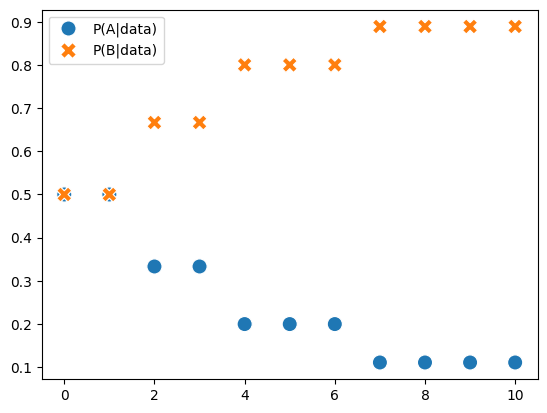

In [8]:
import pandas as pd
import seaborn as sns

# first 0 for index convenience
cond_dist_a = [0, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6] 
cond_dist_b = [0, 1/3, 1/6, 1/6, 1/6, 1/6,  0]  
data = [2, 1, 4, 1, 3, 3, 1, 4, 4, 5]

p_a, p_b = [0.5], [0.5]
for d in data: 
    p_a.append(cond_dist_a[d]*p_a[-1] / \
               (cond_dist_a[d]*p_a[-1] + cond_dist_b[d]*p_b[-1]))
    p_b.append(1-p_a[-1])

df = pd.DataFrame({'P(A|data)': p_a, 'P(B|data)': p_b})    
sns.scatterplot(df, s=120);


### It would be more convenient to track the odds in favor of A

Instead of keeping track of $P(A)$ and $P(B)$ separately, we'll just keep track of the **odds** favoring $A$ over $B$: 

${\large Odds = \frac{P(A|data)}{P(B|data)} = \frac{P(data|A) \ P(A)}{P(data|B) \ P(B)}}$. 

</br> 

Come to think of it, keeping track of the $\log[ \ Odds \ ]$ will turn the products into sums: 

$${ \log \left[ Odds \right] = \underbrace{\log\left[P(A)/P(B)\right]}_{\text{log odds before considering the data point}} } + \underbrace{\log\left[ P(data|A) \right] - \log\left[P(data|B)\right]}_{\text{log ratio of conditional probabilities (from tables)}}$$. 

<br/> 

This is convenient because the code below is shorter and it is even easy to perform the calculation manually.



[-1.  0.  0.  0.  0. inf]


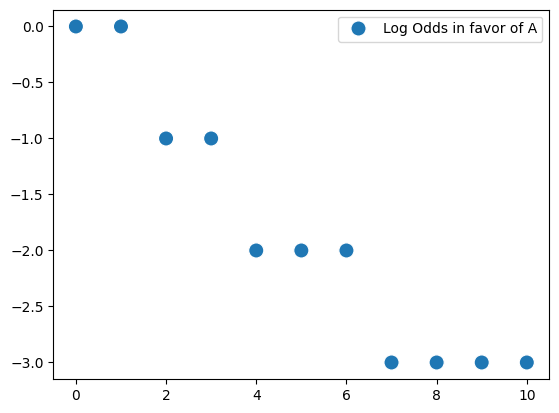

In [9]:
with np.errstate(divide='ignore'):
    with np.errstate(invalid='ignore'):
        log_cond_dist_ratio = np.log2(cond_dist_a) - \
                              np.log2(cond_dist_b)
print(log_cond_dist_ratio[1:])

log_odds = [0]
for d in data: 
    log_odds.append(log_odds[-1]+log_cond_dist_ratio[d])

df = pd.DataFrame({'Log Odds in favor of A': log_odds})    
sns.scatterplot(df, s=120);


### This is convenient even with pen and paper:

(as long as we have a table of the logs of the conditional probabilities)

|                                       | k=1      | k=2      | k=3      | k=4      | k=5      | k=6       |  
|:-------------------------------------:|:--------:|:--------:|:--------:|:--------:|:--------:|:---------:|
| $\log\left[P(Outcome = k | A)\right]$ | -2.585 | -2.585 | -2.585 | -2.585 | -2.585 | -2.585  |
| $\log\left[P(Outcome = k | B)\right]$ | -1.585 | -2.585 | -2.585 | -2.585 | -2.585 | $-\infty$ |
| $\log\left[P(Outcome = k | A)\right] - \log\left[P(Outcome = k | B)\right]$ | -1 | 0 | 0 | 0 | 0 | $\infty$  |


If the data are $2$, $1$, $4$, $1$, $3$, $3$, $1$, $4$, $4$, and $5$ then: 

$\log\left[ Odds \right] = 0 \ \ + \ \ \underbrace{(-2.585)-(-2.585)}_{d_1=2} \ \ + \ \ \underbrace{(-2.585)-(-1.585)}_{d_2=1} \ \ + \ \ \underbrace{(-2.585)-(-2.585)}_{d_3=4} \ \ + \ \  \underbrace{(-2.585)-(-1.585)}_{d_4=1} \ \ + \ \ \dots $

$\log\left[ Odds \right] = 0 + 0 - 1 + 0 - 1 + 0 + 0 - 1 + 0 + 0 + 0 = -3$



### Example 2: One fair eleven-sided die labeled $2..12$ vs. the sum of two regular six-sided dice:


|                      | k=2           | k=3        | k=4        | k=5        | k=6        | k=7        | k=8        | k=9        | k=10       | k=11       | k=12       |  
|:--------------------:|:-------------:|:----------:|:----------:|:----------:|:----------:|:----------:|:-------:|:----------:|:----------:|:----------:|:----------:|
| $P(Outcome = k | A)$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ | $\frac 1{11}$ |
| $P(Outcome = k | B)$ | $\frac 1{36}$ | $\frac 2{36}$ | $\frac 3{36}$ | $\frac 4{36}$ | $\frac 5{36}$ | $\frac 6{36}$ | $\frac 5{36}$ | $\frac 4{36}$ | $\frac 3{36}$ | $\frac 2{36}$ | $\frac 1{36}$ |
| $\log\left[P(Outcome = k | A)\right]-\log\left[P(Outcome = k | B)\right]$ | 1.71 | 0.71 | 0.13 | -0.29 | -0.61 | -0.87 | -0.61 | -0.29 | 0.13 | 0.71 | 1.71 |


One of the two options is chosen at random once: initially $P(A)=P(B)=\frac 12$. The same type of roll is then repeated **sequentially** without its identity being revealed directly. The goal is to find the probability that it is $A$ or $B$ based on the sequence of die-roll results. 


Instead of keeping track of $P(A)$ and $P(B)$ separately, we'll just keep track of the **log odds** favoring $A$ over $B$: 

${\large \log \left[ Odds_n \right] = \log\left[Odds_{n-1}\right] + \log\left[ P(data|A) \right] - \log\left[P(data|B)\right]}$. 

This way, each roll simply adds a new number to the sum (as before). 


[ 1.71049338  0.71049338  0.12553088 -0.28950662 -0.61143471 -0.87446912
 -0.61143471 -0.28950662  0.12553088  0.71049338  1.71049338]


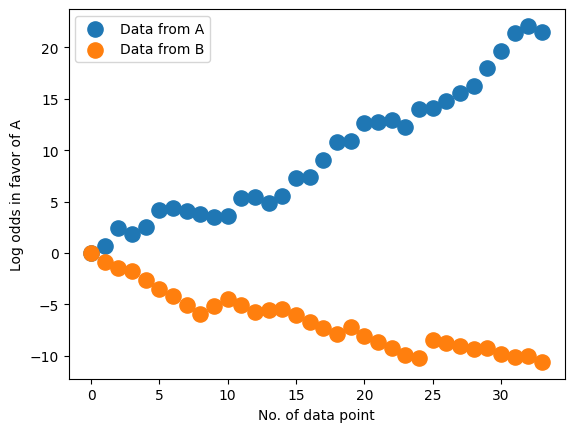

In [10]:
import matplotlib.pyplot as plt 

cond_dist_a = [0, 0, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11]
cond_dist_b = [0, 0, 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
with np.errstate(divide='ignore'):
    with np.errstate(invalid='ignore'):
        log_cond_dist_ratio = np.log2(cond_dist_a) - np.log2(cond_dist_b)
print(log_cond_dist_ratio[2:])

def plot_log_odds(data, clr, lbl): 
    '''
    Input: an array of outcomes of rolls of 'A' or 'B'
    Output: none, but it plots the log odd ratios in favor of 'A'
    '''
    log_odds = [0] # initially p=0.5 for picking either 'A' or 'B'
    for d in data: 
        log_odds.append(log_odds[-1]+log_cond_dist_ratio[d])
    plt.scatter(range(len(log_odds)), log_odds, c=clr, s=120, label=lbl)
    plt.legend()
    plt.xlabel('No. of data point')
    plt.ylabel('Log odds in favor of A')
    return()

N = 33  

data = np.random.randint(2,13,N) # data from the 11-sided fair die
plot_log_odds(data, 'C0', 'Data from A')

data = np.random.choice(range(2,13), p=cond_dist_b[2:], size=N) # data from sum of two 6-sided dice
plot_log_odds(data, 'C1', 'Data from B');



### Side question: how many rolls (on average) would it take to tell 'A' or 'B'? 

That would depend on the desired level of centainty... 

Suppose we want to make the call at $99:1$ odds. 

The corresponding log odds is $\log_2(99/1) = 6.63$  



In [5]:
expected_log_odds_a = (np.array(cond_dist_a[2:])*np.array(log_cond_dist_ratio[2:])).sum()
expected_log_odds_b = (np.array(cond_dist_b[2:])*np.array(log_cond_dist_ratio[2:])).sum()

expected_num_rolls_a = np.log2(99) / expected_log_odds_a 
expected_num_rolls_b = np.log2(99) / expected_log_odds_b 

print("Expected no. of rolls to determine 'A': %.1f"%expected_num_rolls_a)
print("Expected no. of rolls to determine 'B': %.1f"%expected_num_rolls_b)

NameError: name 'cond_dist_a' is not defined

#### For the statistically inclined: 
$\sim 30$ is a large enough number to trust the means to 'behave' (CLT).  